In [1]:
""" Linear SVM on MNIST with PCA """

#%%
from sklearn.datasets import fetch_mldata
from sklearn import svm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from timeit import default_timer as timer

# Data Loading and Preprocessing

In [2]:
# Dataset
mnist = fetch_mldata('MNIST original', data_home="../data/raw")
X = mnist.data
y = mnist.target

In [3]:
# Scale to [-1, 1]
X = X/255.0*2 - 1

In [27]:
# Dimensionality reduction
pca = PCA(n_components=50, svd_solver='randomized', whiten=True)
X_transformed = pca.fit_transform(X)

Text(0,0.5,'Variance')

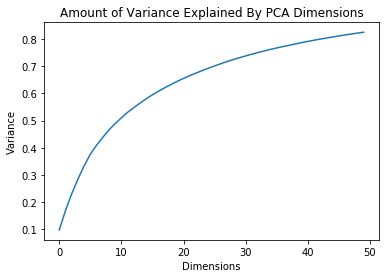

In [28]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Amount of Variance Explained By PCA Dimensions')
plt.xlabel('Dimensions')
plt.ylabel('Variance')

We see here that for the first 10 or so dimensions, each additional dimension accounts for a significant increase in variance. 20 is a possible sweet-spot: accounting for around 60% of the variance but still low-dimensional enough to cause a drastic speedup in model training and prevention of overfitting on the training set. 

In [34]:
pca = PCA(n_components=20, svd_solver='randomized', whiten=True)
X_transformed = pca.fit_transform(X)

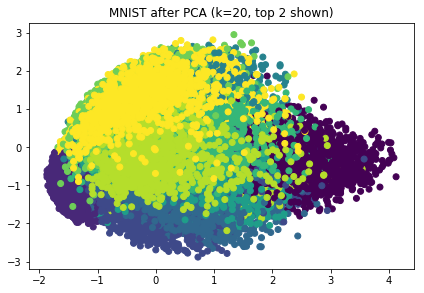

In [42]:
fig, plot = plt.subplots()
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y)
plt.tight_layout()
plt.title('MNIST after PCA (k=20, top 2 shown)')
plt.show()

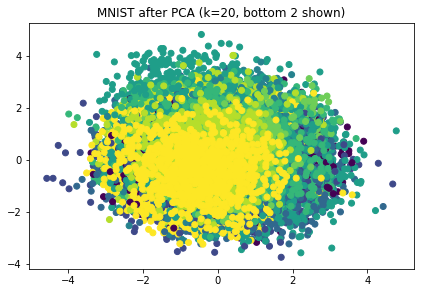

In [45]:
fig, plot = plt.subplots()
plt.scatter(X_transformed[:, 18], X_transformed[:, 19], c=y)
plt.tight_layout()
plt.title('MNIST after PCA (k=20, bottom 2 shown)')
plt.show()

In [46]:
# Train/test split
split = 60000
X_train = X_transformed[:split, :]
y_train = y[:split]

X_test = X_transformed[split:, :]
y_test = y[split:]

# Training SVM

In [47]:
# SVM Model
start = timer()
model = svm.LinearSVC(verbose=True)
model.fit(X_train,y_train)
end = timer()
print("Time: " + str(end - start))

[LibLinear]Time: 34.68259027399472


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [50]:
score = model.score(X_test, y_test)
print(score)

0.8669


# Discussion

Using Linear SVM, we achieve a 86.67% classification accuracy on the test set (10,000) after training on the training set (60,000), which was dimensionally reduced from 784 to 20 dimensions using PCA. It is worth noting that this accuracy is significantly lower than state-of-the-art methods, and that many types of classifiers can easily reach 97%+ accuracy. One significant reason that our accuracy is so low is that we are not making use of the kernel trick, and thus are losing huge amounts of potential performance.

### On the Library and the Future
We also note that the sci-kit library is extremely powerful for non-neural-network machine-learning techniques. Its implementations of PCA (and most likely its classifiers as well) run orders of magnitudes faster than the implementations we created in the last project. There are also a wealth of options for each portion of the library dedicated to providing maximum flexibility. At the same time, we recognize the power that comes with being able to write out the basic machine-learning methods ourselves. For example, knowing exactly how PCA works tells us why we need to whiten the data first. In the future, we will likely use Scikit-Learn for most traditional machine-learning tasks, and will supplement the existing classifiers with handwritten code when needed.